Importing the Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

#Dataset Loading

data = pd.read_csv('/content/spam_ham_dataset.csv')


Handling Missing Values

In [22]:

data.isnull().sum()


nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def preprocess_text(text):

    tokens = word_tokenize(text.lower())

    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)


data['text'] = data['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


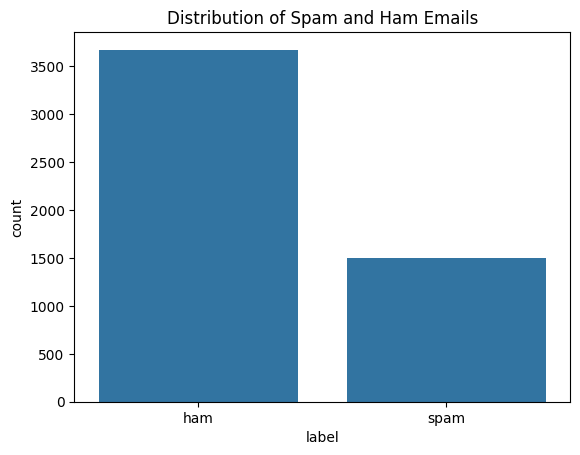

In [23]:
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam and Ham Emails')
plt.show()


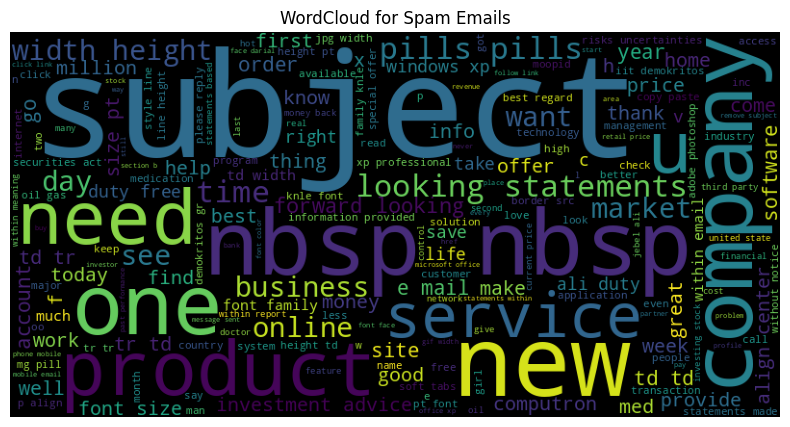

In [24]:
spam_words = ' '.join(list(data[data['label'] == 'spam']['text']))
wordcloud_spam = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam)
plt.axis('off')
plt.title('WordCloud for Spam Emails')
plt.show()

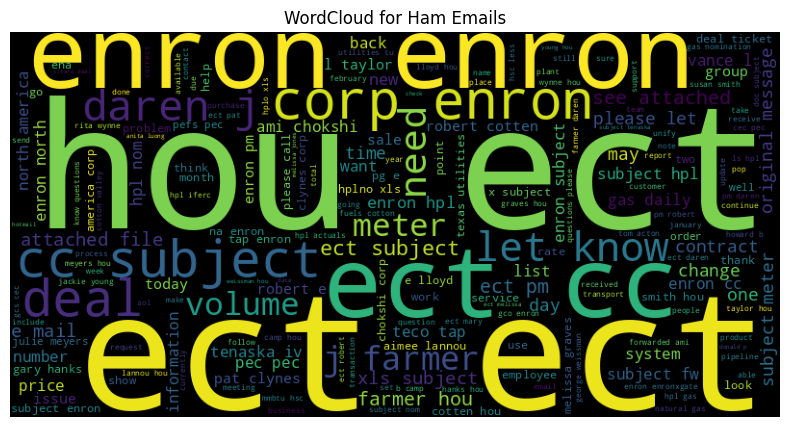

In [25]:
ham_words = ' '.join(list(data[data['label'] == 'ham']['text']))
wordcloud_ham = WordCloud(width=800, height=400, background_color='black').generate(ham_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ham)
plt.axis('off')
plt.title('WordCloud for Ham Emails')
plt.show()

In [26]:
X = data['text']
y = data['label'].map({'ham': 0, 'spam': 1})

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
tfidf = TfidfVectorizer(max_features=5000)

In [29]:
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

Defining and Compiling TensorFlow Model

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(5000,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(X_train_tfidf, y_train, epochs=5, batch_size=32, validation_data=(X_test_tfidf, y_test))

Epoch 1/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7727 - loss: 0.4828 - val_accuracy: 0.9778 - val_loss: 0.0829
Epoch 2/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9898 - loss: 0.0535 - val_accuracy: 0.9884 - val_loss: 0.0404
Epoch 3/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9975 - loss: 0.0149 - val_accuracy: 0.9884 - val_loss: 0.0352
Epoch 4/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9995 - loss: 0.0053 - val_accuracy: 0.9884 - val_loss: 0.0351
Epoch 5/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9996 - loss: 0.0035 - val_accuracy: 0.9884 - val_loss: 0.0370


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 98.84%


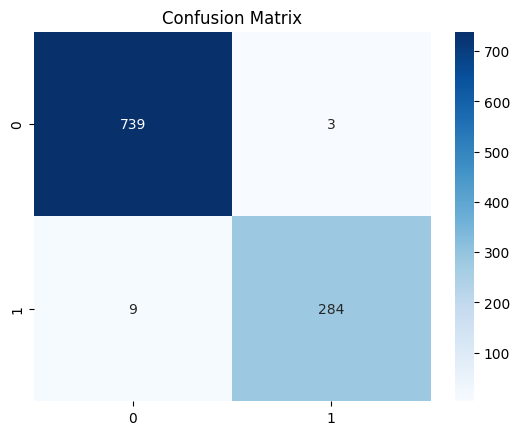

In [33]:
y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Prediction on New Mails

In [34]:
def predict_email(text):
    text_preprocessed = preprocess_text(text)
    text_vectorized = tfidf.transform([text_preprocessed]).toarray()
    prediction = model.predict(text_vectorized)
    return 'Spam' if prediction > 0.5 else 'Ham'

In [35]:
new_email = "Subject: photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvierirvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin"
print(predict_email(new_email))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Spam
